In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/app-failure-train/aps_failure_training_set.csv


**Loading Packages**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [62]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif
from imblearn.over_sampling import SMOTE

**Loading Dataset & Preprocessing**

In [7]:
#loading the dataset
df = pd.read_csv('/kaggle/input/app-failure-train/aps_failure_training_set.csv')
df.shape

(60000, 171)

In [8]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [9]:
df['class'].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


<Axes: xlabel='class', ylabel='count'>

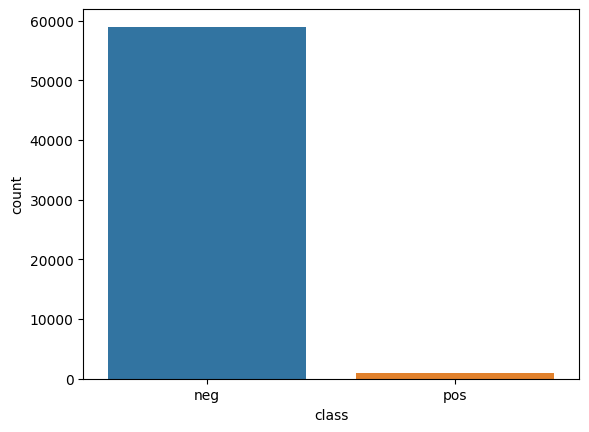

In [11]:
sns.countplot(df,x = 'class')

In [13]:
X = df.drop('class',axis = 1)
y = df['class']
X.shape,y.shape

((60000, 170), (60000,))

In [45]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.20,random_state =42, shuffle = True)
Xtrain.shape, Xtest.shape

((48000, 170), (12000, 170))

In [46]:
columns = Xtrain.columns

In [47]:
Xtrain.replace('na',-99999999999999999,inplace = True)
Xtest.replace('na',-99999999999999999,inplace = True)
Xtrain.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
48572,18,0,22,20,0,0,0,0,0,0,...,126,64,104,154,38,0,0,0,0,0
38696,30,-99999999999999999,42,42,0,0,0,0,0,0,...,734,82,102,6,0,0,0,0,0,0
13611,14,-99999999999999999,8,-99999999999999999,0,0,0,0,0,0,...,140,34,56,40,36,140,0,0,0,0
35213,41650,-99999999999999999,2130706434,364,0,0,0,0,0,0,...,298444,174792,401068,438100,325162,166102,89058,4040,0,0
31766,59684,-99999999999999999,0,-99999999999999999,0,0,0,0,0,0,...,323444,126844,334944,483618,713282,469092,117246,802,0,0


In [48]:
for cols in Xtrain.columns:
    if Xtrain[cols].dtypes == 'object':
        Xtrain[cols] = Xtrain[cols].astype('float')
        Xtest[cols] = Xtest[cols].astype('float')

In [49]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48000 entries, 48572 to 56422
Columns: 170 entries, aa_000 to eg_000
dtypes: float64(169), int64(1)
memory usage: 62.6 MB


In [50]:
Xtrain.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
48572,18,0.000000e+00,2.200000e+01,2.000000e+01,0.0,0.0,0.0,0.0,0.0,0.0,...,126.0,64.0,104.0,154.0,38.0,0.0,0.0,0.0,0.0,0.0
38696,30,-1.000000e+17,4.200000e+01,4.200000e+01,0.0,0.0,0.0,0.0,0.0,0.0,...,734.0,82.0,102.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
13611,14,-1.000000e+17,8.000000e+00,-1.000000e+17,0.0,0.0,0.0,0.0,0.0,0.0,...,140.0,34.0,56.0,40.0,36.0,140.0,0.0,0.0,0.0,0.0
35213,41650,-1.000000e+17,2.130706e+09,3.640000e+02,0.0,0.0,0.0,0.0,0.0,0.0,...,298444.0,174792.0,401068.0,438100.0,325162.0,166102.0,89058.0,4040.0,0.0,0.0
31766,59684,-1.000000e+17,0.000000e+00,-1.000000e+17,0.0,0.0,0.0,0.0,0.0,0.0,...,323444.0,126844.0,334944.0,483618.0,713282.0,469092.0,117246.0,802.0,0.0,0.0


In [51]:
Xtrain.replace(-99999999999999999,np.nan,inplace = True)
Xtest.replace(-99999999999999999,np.nan,inplace = True)

In [52]:
Xtrain.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
48572,18,0.0,2.200000e+01,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,126.0,64.0,104.0,154.0,38.0,0.0,0.0,0.0,0.0,0.0
38696,30,NaN,4.200000e+01,42.0,0.0,0.0,0.0,0.0,0.0,0.0,...,734.0,82.0,102.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
13611,14,NaN,8.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,140.0,34.0,56.0,40.0,36.0,140.0,0.0,0.0,0.0,0.0
35213,41650,NaN,2.130706e+09,364.0,0.0,0.0,0.0,0.0,0.0,0.0,...,298444.0,174792.0,401068.0,438100.0,325162.0,166102.0,89058.0,4040.0,0.0,0.0
31766,59684,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,323444.0,126844.0,334944.0,483618.0,713282.0,469092.0,117246.0,802.0,0.0,0.0


In [53]:
Xtrain.isnull().sum()

aa_000        0
ab_000    37064
ac_000     2628
ad_000    11839
ae_000     1968
          ...  
ee_007      546
ee_008      546
ee_009      546
ef_000     2148
eg_000     2147
Length: 170, dtype: int64

In [54]:
si = SimpleImputer(strategy = 'median')
Xtrain = si.fit_transform(Xtrain)
Xtest = si.transform(Xtest)

In [55]:
Xtrain = pd.DataFrame(Xtrain, columns = columns)
Xtest = pd.DataFrame(Xtest,columns = columns)
Xtrain.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,18.0,0.0,2.200000e+01,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,126.0,64.0,104.0,154.0,38.0,0.0,0.0,0.0,0.0,0.0
1,30.0,0.0,4.200000e+01,42.0,0.0,0.0,0.0,0.0,0.0,0.0,...,734.0,82.0,102.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.0,0.0,8.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,140.0,34.0,56.0,40.0,36.0,140.0,0.0,0.0,0.0,0.0
3,41650.0,0.0,2.130706e+09,364.0,0.0,0.0,0.0,0.0,0.0,0.0,...,298444.0,174792.0,401068.0,438100.0,325162.0,166102.0,89058.0,4040.0,0.0,0.0
4,59684.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,323444.0,126844.0,334944.0,483618.0,713282.0,469092.0,117246.0,802.0,0.0,0.0


In [56]:
Xtrain.isnull().sum()

aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

**Feature Selection**

In [57]:
#feature selection
guc = GenericUnivariateSelect(mutual_info_classif, mode = 'percentile', param = 20)
Xtrain_transformed = guc.fit_transform(Xtrain,ytrain)
Xtest_transformed = guc.transform(Xtest)

In [58]:
selected_cols = Xtrain.columns[guc.get_support()]
selected_cols

Index(['aa_000', 'ag_005', 'ah_000', 'an_000', 'ao_000', 'ap_000', 'aq_000',
       'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'bb_000', 'bg_000',
       'bh_000', 'bi_000', 'bj_000', 'bo_000', 'bp_000', 'bq_000', 'br_000',
       'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'cc_000', 'ci_000',
       'ck_000', 'cq_000', 'cs_002', 'cs_004', 'dn_000', 'ee_000'],
      dtype='object')

In [59]:
Xtrain_transformed = pd.DataFrame(Xtrain_transformed,columns = selected_cols)
Xtest_transformed = pd.DataFrame(Xtest_transformed, columns = selected_cols)

In [60]:
Xtrain_transformed.head()

,aa_000,ag_005,ah_000,an_000,ao_000,ap_000,aq_000,ba_000,ba_001,ba_002,...,bx_000,by_000,cc_000,ci_000,ck_000,cq_000,cs_002,cs_004,dn_000,ee_000
0,18.0,1916.0,606.0,6408.0,4912.0,31398.0,492.0,3344.0,416.0,156.0,...,39494.0,23.0,4934.0,2637.12,995.52,37822.0,18.0,346.0,176.0,2434.0
1,30.0,4250.0,3058.0,7478.0,5016.0,12224.0,1182.0,6030.0,1288.0,274.0,...,25582.0,17.0,7742.0,4595.52,3117.12,19714.0,12.0,506.0,120.0,3470.0
2,14.0,3108.0,2244.0,3840.0,1362.0,11826.0,594.0,4494.0,284.0,302.0,...,18518.0,26.0,5838.0,1862.40,2946.24,15694.0,22.0,878.0,214.0,4116.0
3,41650.0,151278.0,1148192.0,2224436.0,1850766.0,540964.0,308850.0,730362.0,816670.0,266474.0,...,2747986.0,15560.0,2584872.0,2275933.44,307040.64,2765966.0,39514.0,92446.0,23838.0,323560.0
4,59684.0,741378.0,1894584.0,3284840.0,2858838.0,556526.0,331914.0,1327796.0,812078.0,372224.0,...,3847850.0,16756.0,3697996.0,3355488.96,334802.88,3842892.0,7164.0,211810.0,31968.0,374652.0


In [61]:
ytrain.value_counts()

class
neg    47212
pos      788
Name: count, dtype: int64

In [63]:
lb = LabelEncoder()
ytrain = lb.fit_transform(ytrain.values)
ytest = lb.transform(ytest.values)

In [72]:
#oversampling to counter imbalance
sm = SMOTE(random_state = 42)
Xtrain_new, ytrain_new = sm.fit_resample(Xtrain_transformed,ytrain)
Xtrain_new.shape,ytrain_new.shape

((94424, 34), (94424,))

In [69]:
pd.DataFrame(ytrain_new).value_counts()

0
0    47212
1    47212
Name: count, dtype: int64

In [73]:
ss = StandardScaler()
Xtrain_new = ss.fit_transform(Xtrain_new)
Xtest_new = ss.transform(Xtest_transformed)

In [74]:
#conversion to tensors
train_data = torch.tensor(Xtrain_new,dtype = torch.float32)
test_data = torch.tensor(Xtest_new,dtype = torch.float32)

In [76]:
train_label = torch.tensor(ytrain_new, dtype = torch.long)
test_label = torch.tensor(ytest,dtype = torch.long)

In [77]:
train_data.shape, train_label.shape

(torch.Size([94424, 34]), torch.Size([94424]))

In [78]:
n_samples, n_features = train_data.shape

**ANN Model Training Using Pytorch**

In [90]:
input_size = n_features
hidden_size = 500
output_size = 2
epochs = 500

In [91]:
#check for gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [92]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size,output_size):
        super(NeuralNetwork,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu1 = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,hidden_size)
        self.relu2 = nn.ReLU()
        self.l3 = nn.Linear(hidden_size,output_size)

    def forward(self,x):
        out = self.l1(x)
        out = self.relu1(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.l3(out)

        return out
        

In [93]:
model = NeuralNetwork(input_size,hidden_size,output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [94]:
#convert data to gpu
train_data = train_data.to(device)
train_label = train_label.to(device)

Epoch: 0, Loss: 0.6713019609451294
Epoch: 20, Loss: 0.3002428114414215
Epoch: 40, Loss: 0.27971699833869934
Epoch: 60, Loss: 0.17530149221420288
Epoch: 80, Loss: 0.14867356419563293
Epoch: 100, Loss: 0.13599905371665955
Epoch: 120, Loss: 0.13991326093673706
Epoch: 140, Loss: 0.16207581758499146
Epoch: 160, Loss: 0.1375834196805954
Epoch: 180, Loss: 0.11988935619592667
Epoch: 200, Loss: 0.1056719422340393
Epoch: 220, Loss: 0.11671125888824463
Epoch: 240, Loss: 0.10451442003250122
Epoch: 260, Loss: 0.09197589010000229
Epoch: 280, Loss: 0.11344819515943527
Epoch: 300, Loss: 0.09338690340518951
Epoch: 320, Loss: 0.08161549270153046
Epoch: 340, Loss: 0.07728053629398346
Epoch: 360, Loss: 0.10386816412210464
Epoch: 380, Loss: 0.07932567596435547
Epoch: 400, Loss: 0.13743866980075836
Epoch: 420, Loss: 0.10959667712450027
Epoch: 440, Loss: 0.08816654980182648
Epoch: 460, Loss: 0.2212018519639969
Epoch: 480, Loss: 0.1042507067322731


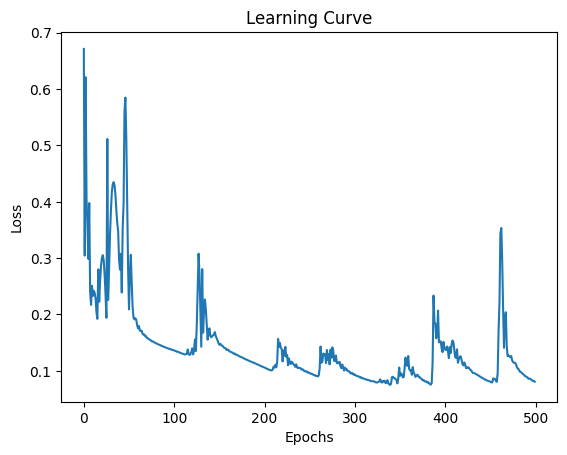

In [95]:
#training
losses = []
for epoch in range(epochs):
    #forward pass
    ypred = model(train_data)
    loss = criterion(ypred,train_label)
    losses.append(loss.item())

    #backwardpass
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


    if(epoch%20==0):
        print(f'Epoch: {epoch}, Loss: {loss.item()}')


#plotting the loss curve
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()

In [99]:
#prediction on validation data
test_data = test_data.to(device)
test_label = test_label.to(device)
with torch.no_grad():
    y_test_pred = model(test_data)
    pred_label = torch.argmax(y_test_pred,dim = 1)
    correct_pred = (pred_label==test_label).sum().item()

    accuracy = correct_pred/test_label.shape[0]
    print(f'Accuracy:{accuracy}')

Accuracy:0.9755


In [100]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11788
           1       0.41      0.83      0.55       212

    accuracy                           0.98     12000
   macro avg       0.70      0.91      0.77     12000
weighted avg       0.99      0.98      0.98     12000



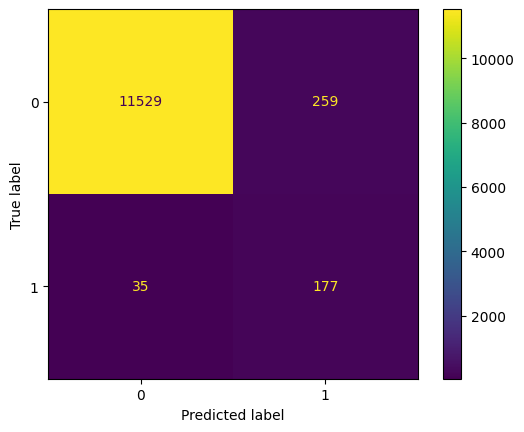

In [104]:
pred_label_np = pred_label.cpu().numpy()
test_label_np = test_label.cpu().numpy()
# Generate and print the classification report
print(classification_report(test_label_np, pred_label_np))

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(test_label_np, pred_label_np)
plt.show()  # To show the confusion matrix plot

**Test Data**

In [114]:
#Loading the TEST DATA
test = pd.read_csv('/kaggle/input/appfailuretest/aps_failure_test_set.csv')
test.shape

(16000, 171)

In [115]:
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [116]:
test.replace('na',-99999999999999999,inplace = True)
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,-99999999999999999,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,-99999999999999999,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [117]:
test_data,test_class = test.drop('class',axis = 1),test['class']

In [118]:
for cols in test_data.columns:
    if test_data[cols].dtypes == 'object':
        test_data[cols] = test_data[cols].astype('float')

In [119]:
test_data.replace(-99999999999999999,np.nan,inplace = True)
test_data.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [120]:
test_data = si.transform(test_data)
test_data = pd.DataFrame(test_data, columns = columns)
test_data.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.0,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.0,156.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [121]:
test_data = guc.transform(test_data)
test_data = pd.DataFrame(test_data,columns = selected_cols)
test_data.head()

,aa_000,ag_005,ah_000,an_000,ao_000,ap_000,aq_000,ba_000,ba_001,ba_002,...,bx_000,by_000,cc_000,ci_000,ck_000,cq_000,cs_002,cs_004,dn_000,ee_000
0,60.0,3862.0,3976.0,11516.0,9480.0,111258.0,470.0,8762.0,2566.0,480.0,...,184970.0,54.0,13196.0,5913.60,5851.20,124340.0,36.0,920.0,340.0,7502.0
1,82.0,12594.0,5244.0,23174.0,18166.0,23686.0,1270.0,12564.0,1756.0,638.0,...,48324.0,68.0,17050.0,7224.96,7768.32,46894.0,114.0,700.0,352.0,10040.0
2,66002.0,1952422.0,1891670.0,3605894.0,3291610.0,959756.0,286536.0,1662580.0,667960.0,387998.0,...,4608738.0,22706.0,3991552.0,3594885.12,374649.60,4644422.0,162660.0,217930.0,25278.0,396312.0
3,59816.0,984314.0,1772828.0,3546760.0,3053176.0,652616.0,423374.0,1283806.0,928212.0,345132.0,...,4203050.0,29967.0,4030198.0,3387773.76,599624.64,4201350.0,70090.0,191284.0,27740.0,659550.0
4,1814.0,17926.0,48978.0,97146.0,89920.0,12932.0,5092.0,53558.0,34620.0,9824.0,...,113274.0,364.0,103946.0,94319.04,9556.80,110094.0,86.0,1792.0,538.0,10216.0


In [122]:
test_class = lb.transform(test_class.values)

In [123]:
test_data = ss.transform(test_data)

In [124]:
test_data = torch.tensor(test_data,dtype = torch.float32)

In [125]:
test_class = torch.tensor(test_class,dtype = torch.long)

In [126]:
test_data = test_data.to(device)
test_class = test_class.to(device)
with torch.no_grad():
    y_test_pred = model(test_data)
    pred_label = torch.argmax(y_test_pred,dim = 1)
    correct_pred = (pred_label==test_class).sum().item()

    accuracy = correct_pred/test_class.shape[0]
    print(f'Accuracy:{accuracy}')

Accuracy:0.978375


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.52      0.83      0.64       375

    accuracy                           0.98     16000
   macro avg       0.76      0.91      0.82     16000
weighted avg       0.98      0.98      0.98     16000



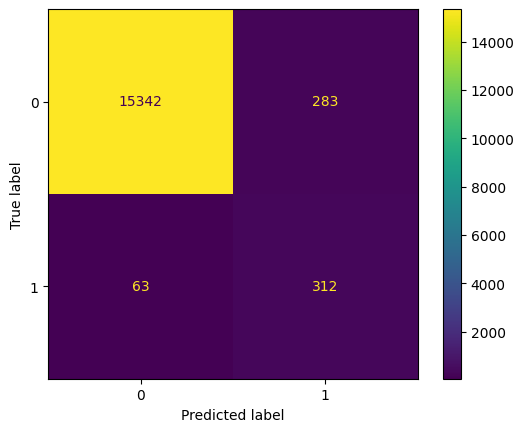

In [128]:
pred_label_np = pred_label.cpu().numpy()
test_class_np = test_class.cpu().numpy()
# Generate and print the classification report
print(classification_report(test_class_np, pred_label_np))

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(test_class_np, pred_label_np)
plt.show()  # To show the confusion matrix plot

In [130]:
from sklearn.metrics import f1_score
print(f'F1-Score:{f1_score(test_class_np,pred_label_np)}')

F1-Score:0.643298969072165
